In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Transformed Image')

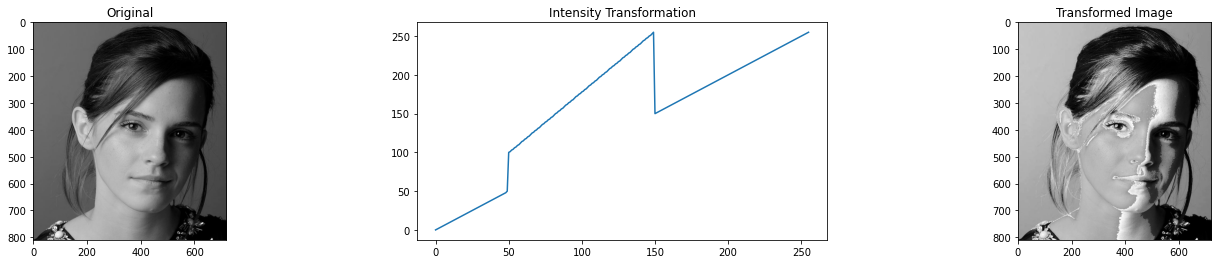

In [2]:
im=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert im is not None
t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)
t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
im_1=t[im]
fig,ax=plt.subplots(1,3,figsize=(25,4))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].plot(t)
ax[2].imshow(cv.cvtColor(im_1,cv.COLOR_BGR2RGB))
t='Original'
t1='Intensity Transformation'
t2='Transformed Image'
ax[0].set_title(t)
ax[1].set_title(t1)
ax[2].set_title(t2)

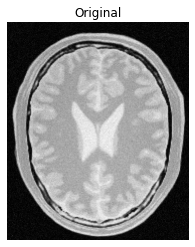

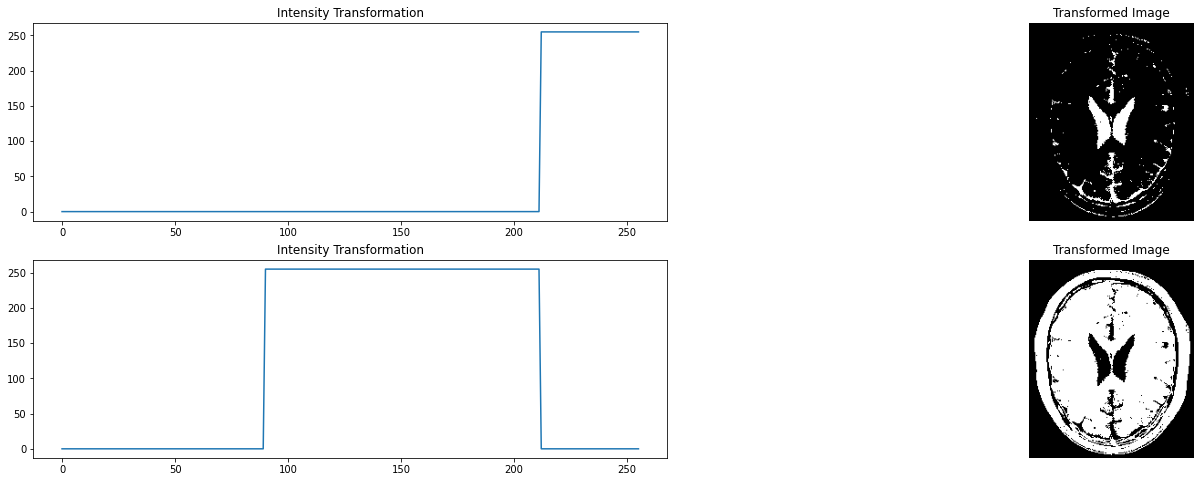

In [3]:
im=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None
fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
Text='Original'
ax.set_title(Text)
ax.axis('off')

t1=np.linspace(0,0,212)
t2=np.linspace(255,255,38)
t3=np.linspace(255,255,6)
t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
im_1=t[im]
fig,ax=plt.subplots(2,2,figsize=(25,8))
#ax[0][0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0][0].plot(t)
ax[0][1].imshow(cv.cvtColor(im_1,cv.COLOR_BGR2RGB))
#Text='Original'
Text1='Intensity Transformation'
Text2='Transformed Image'
#ax[0][0].set_title(Text)
ax[0][0].set_title(Text1)
ax[0][1].set_title(Text2)

t1=np.linspace(0,0,90)
t2=np.linspace(255,255,122)
t3=np.linspace(0,0,44)
t_new=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
im_2=t_new[im]
#ax[1][0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1][0].plot(t_new)
ax[1][1].imshow(cv.cvtColor(im_2,cv.COLOR_BGR2RGB))
#ax[1][0].set_title(Text)
ax[1][0].set_title(Text1)
ax[1][1].set_title(Text2)
for i in range(2):
    ax[i][1].axis('off')
        

Text(0.5, 1.0, 'Equalized image')

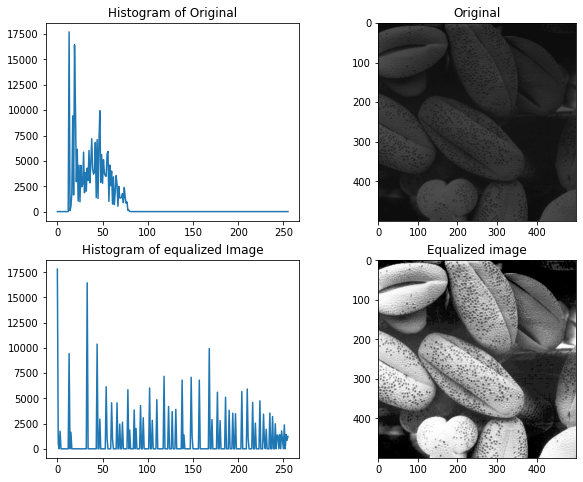

In [4]:
f=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None
hist_f=cv.calcHist([f],[0],None,[256],[0,256])
g=cv.equalizeHist(f)
hist_g=cv.calcHist([g],[0],None,[256],[0,256])
fig,ax=plt.subplots(2,2,figsize=(10,8))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0][0].plot(hist_f)
ax[1][0].plot(hist_g)
ax[0][1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[0][0].set_title(t00)
ax[1][0].set_title(t10)
ax[0][1].set_title(t01)
ax[1][1].set_title(t11)

Text(0.5, 1.0, 'Equalized image')

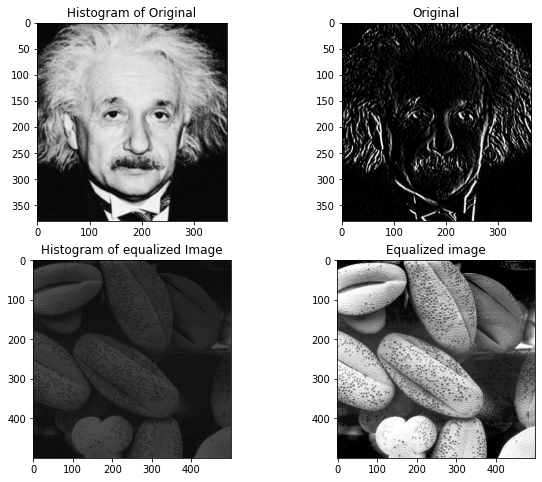

In [5]:
im=cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)
kernel=np.array([(1,0,-1),(2,0,-2),(1,0,-1)])
Filter2D_im=cv.filter2D(im,-1,kernel)
fig,ax=plt.subplots(2,2,figsize=(10,8))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0][0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0][1].imshow(cv.cvtColor(Filter2D_im,cv.COLOR_BGR2RGB))
ax[1][0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[0][0].set_title(t00)
ax[1][0].set_title(t10)
ax[0][1].set_title(t01)
ax[1][1].set_title(t11)


In [6]:
print(Filter2D_im.size)

138320


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


Text(0.5, 1.0, 'Equalized image')

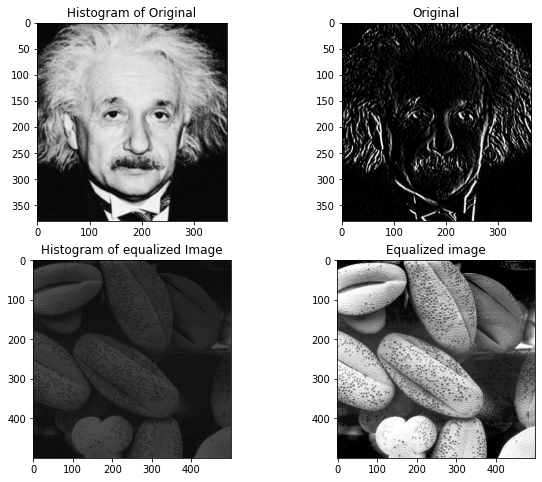

In [7]:
A=np.array([[1,2,1]]).T
B=np.array([[1,0,-1]])
kernel=np.matmul(A,B)
print(kernel)
Filter2D_im=cv.filter2D(im,-1,kernel)
fig,ax=plt.subplots(2,2,figsize=(10,8))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0][0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0][1].imshow(cv.cvtColor(Filter2D_im,cv.COLOR_BGR2RGB))
ax[1][0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[0][0].set_title(t00)
ax[1][0].set_title(t10)
ax[0][1].set_title(t01)
ax[1][1].set_title(t11)


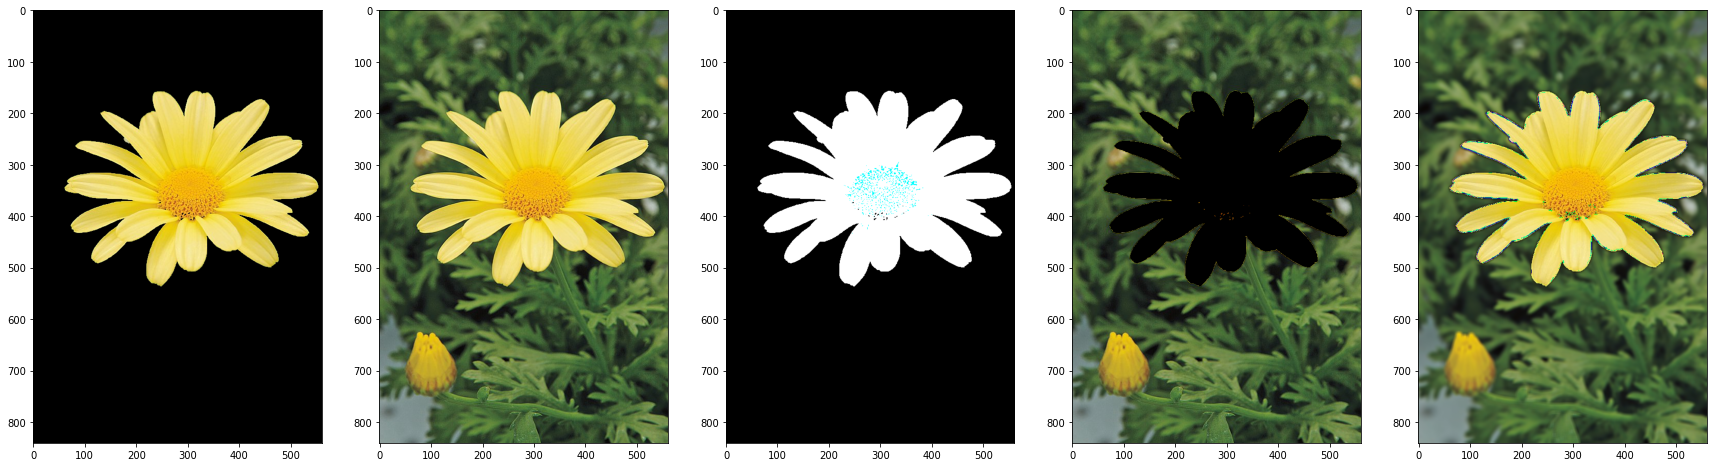

In [8]:
Sigma=20
im=cv.imread("daisy.jpg")
im1=im
mask=np.zeros(im.shape[:2],np.uint8)
background=np.zeros((1,65),np.float64)
foreground=np.zeros((1,65),np.float64)
rect=(40,150,600,450)
cv.grabCut(im,mask,rect,background,foreground,10,cv.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
im = im * mask2[:, :, np.newaxis]
Seg_mask=np.where(im>0,255,0).astype('uint8')
neg_Seg_mask=im1-im
blured=cv.GaussianBlur(neg_Seg_mask,(7,7),Sigma)+im
#print(im[300][300:450])
fig,ax=plt.subplots(1,5,figsize=(30,16))
t00='Histogram of Original'
t10='Histogram of equalized Image'
t01='Original'
t11='Equalized image'
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[2].imshow(Seg_mask)#cv.cvtColor(Seg_mask)),cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(neg_Seg_mask,cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax[4].imshow(cv.cvtColor(blured,cv.COLOR_BGR2RGB))

1000 1000


Text(0.5, 1.0, 'Zoomed Image')

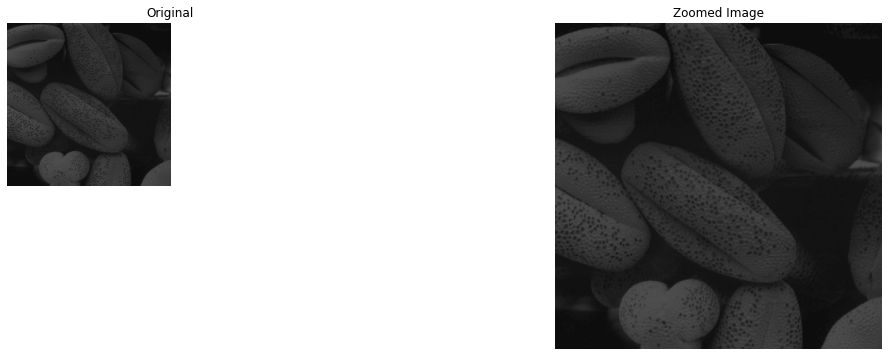

In [18]:
Scaling_Factor=2
im=cv.imread("shells.png")
rows=im.shape[0]*Scaling_Factor
cols=im.shape[1]*Scaling_Factor
print(rows,cols)
zoomed=np.zeros((rows,cols,3),im.dtype)
def ScaledCods(i,j,scale):
    return int(i/scale),int(j/scale)
for i in range(rows):
    for j in range(cols):
        Scaled_i,Scaled_j=ScaledCods(i,j,Scaling_Factor)
        zoomed[i][j]=im[Scaled_i][Scaled_j]
        
fig,ax = plt.subplots(1,2,figsize =[18, 6],sharey=True,sharex=True)

ax[0].imshow(im)
ax[1].imshow(zoomed)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Original')
ax[1].set_title('Zoomed Image')

In [ ]:
round(1.656456)